In [4]:
import pandas as pd
import os
cwd = os.getcwd()

ROOT = os.path.join(cwd, '../../')
DATA_FOLDER = os.path.join(ROOT, 'data/')

df = pd.read_pickle(os.path.join(DATA_FOLDER, 'saeb_pb_2017-2007_fe.pkl'))

df = df.dropna()
print(len(df))
df.head()

232882


,id_aluno,disciplina,proficiencia,erro_padrao,desempenho_aluno,desempenho_aluno_cat,faz_licao_casa_2.0,reprovacao_0.0,reprovacao_1.0,pai_sabe_ler_escrever_1.0,leitura_revista_comportamento_0.0,leitura_jornais_0.0,escolaridade_pai_4.0,mae_sabe_ler_escrever_1.0,leitura_internet_2.0,tempo_lazer_1.0,escolaridade_mae_4.0,gosta_estudar_disciplina_0.0,gosta_estudar_disciplina_1.0
8086,23061434,LP,0.665701,0.312872,Proficiente,2,True,True,False,False,True,True,False,True,True,True,False,False,True
10602,23065563,LP,-1.353424,0.484866,Insuficiente,0,True,False,True,True,False,False,False,False,True,True,False,False,True
13975,23065563,MT,-1.652930,0.564617,Insuficiente,0,True,False,True,True,False,False,False,False,True,True,False,False,True
17847,23065552,MT,-1.099605,0.467812,Insuficiente,0,True,True,False,False,False,False,False,True,False,False,False,False,True
20664,23095249,MT,-1.262341,0.512487,Insuficiente,0,False,False,True,True,False,False,False,True,True,False,False,True,False


In [3]:
print(df.columns)

Index(['id_aluno', 'disciplina', 'proficiencia', 'erro_padrao',
       'desempenho_aluno', 'desempenho_aluno_cat', 'faz_licao_casa_2.0',
       'reprovacao_0.0', 'reprovacao_1.0', 'pai_sabe_ler_escrever_1.0',
       'leitura_revista_comportamento_0.0', 'leitura_jornais_0.0',
       'escolaridade_pai_4.0', 'mae_sabe_ler_escrever_1.0',
       'leitura_internet_2.0', 'tempo_lazer_1.0', 'escolaridade_mae_4.0',
       'gosta_estudar_disciplina_0.0', 'gosta_estudar_disciplina_1.0'],
      dtype='object')


In [5]:
# distribuição das classes
df['desempenho_aluno'].value_counts(dropna=False)

desempenho_aluno
Básico          124830
Insuficiente     78056
Proficiente      26662
Avançado          3334
Name: count, dtype: int64

In [5]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno', 'escola_publica', 'desempenho_aluno', 'proficiencia']

exclude = [col for col in df.columns if col in exclude]

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

from IPython.display import clear_output

clear_output()

In [7]:
num_classes = len(df['desempenho_aluno'].unique())

# softmax

In [8]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

In [10]:
y = to_categorical(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_val.shape, X_test.shape

((149044, 13), (37261, 13), (46577, 13))

In [13]:
# print unique values for each col
for col in X.columns:
    print(f"{col}: {X[col].unique()}")

faz_licao_casa_2.0: [ True False]
reprovacao_0.0: [ True False]
reprovacao_1.0: [False  True]
pai_sabe_ler_escrever_1.0: [False  True]
leitura_revista_comportamento_0.0: [ True False]
leitura_jornais_0.0: [ True False]
escolaridade_pai_4.0: [False  True]
mae_sabe_ler_escrever_1.0: [ True False]
leitura_internet_2.0: [ True False]
tempo_lazer_1.0: [ True False]
escolaridade_mae_4.0: [False  True]
gosta_estudar_disciplina_0.0: [False  True]
gosta_estudar_disciplina_1.0: [ True False]


In [14]:
print(X_train.shape)

(149044, 13)


In [15]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 564 (2.20 KB)

 Trainable params: 564 (2.20 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=48, callbacks=[es])

Epoch 1/100
3106/3106 ━━━━━━━━━━━━━━━━━━━━ 4s 955us/step - accuracy: 0.5369 - loss: 1.0444 - val_accuracy: 0.5470 - val_loss: 0.9589
Epoch 2/100
3106/3106 ━━━━━━━━━━━━━━━━━━━━ 3s 843us/step - accuracy: 0.5457 - loss: 0.9560 - val_accuracy: 0.5468 - val_loss: 0.9590
Epoch 3/100
3106/3106 ━━━━━━━━━━━━━━━━━━━━ 3s 834us/step - accuracy: 0.5495 - loss: 0.9517 - val_accuracy: 0.5470 - val_loss: 0.9579
Epoch 4/100
3106/3106 ━━━━━━━━━━━━━━━━━━━━ 3s 828us/step - accuracy: 0.5451 - loss: 0.9571 - val_accuracy: 0.5455 - val_loss: 0.9590
Epoch 5/100
3106/3106 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step - accuracy: 0.5460 - loss: 0.9557 - val_accuracy: 0.5457 - val_loss: 0.9583
Epoch 6/100
3106/3106 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5457 - loss: 0.9536 - val_accuracy: 0.5471 - val_loss: 0.9582
Epoch 7/100
3106/3106 ━━━━━━━━━━━━━━━━━━━━ 3s 917us/step - accuracy: 0.5451 - loss: 0.9567 - val_accuracy: 0.5472 - val_loss: 0.9562
Epoch 8/100
3106/3106 ━━━━━━━━━━━━━━━━━━━━ 3s 959us/step - accuracy: 0.

In [17]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

1456/1456 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.54      0.18      0.27     15561
           1       0.55      0.91      0.69     25160
           2       0.00      0.00      0.00      5211
           3       0.00      0.00      0.00       645

    accuracy                           0.55     46577
   macro avg       0.27      0.27      0.24     46577
weighted avg       0.48      0.55      0.46     46577



/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


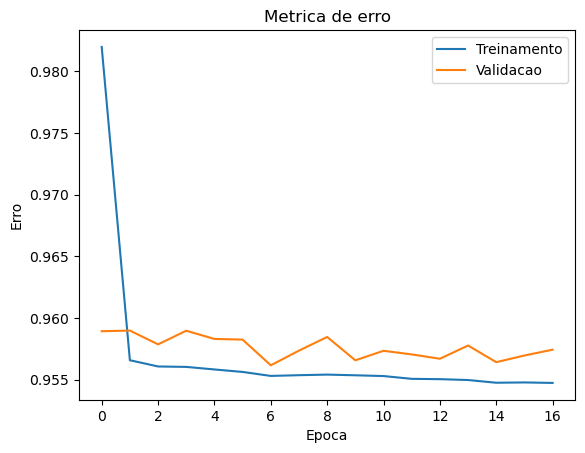

4658/4658 ━━━━━━━━━━━━━━━━━━━━ 4s 911us/step
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

--> Acuracia (treino): 0.5174
--> Acuracia (validacao): 0.5178
--> acc_train - acc_val = -0.0003
--> E_val - E_in = 0.0027


In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# softmax + Random Over Sampling

In [195]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

In [151]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=42)

X_res, y_res = rus.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 3346, 1: 3346, 2: 3346, 3: 3346})


In [152]:
y = to_categorical(y_res)
y_values = y_res
X = X_res

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [154]:
X_train.shape, X_val.shape, X_test.shape

((8565, 14), (2142, 14), (2677, 14))

In [155]:
# print unique values for each col
for col in X.columns:
    print(f"{col}: {X[col].unique()}")

faz_licao_casa_2.0: [ True False]
reprovacao_0.0: [False  True]
reprovacao_1.0: [False  True]
pai_sabe_ler_escrever_0.0: [ True False]
pai_sabe_ler_escrever_1.0: [False  True]
leitura_revista_comportamento_0.0: [False  True]
leitura_jornais_0.0: [ True False]
escolaridade_pai_4.0: [False  True]
mae_sabe_ler_escrever_1.0: [ True False]
leitura_internet_2.0: [False  True]
tempo_lazer_1.0: [False  True]
escolaridade_mae_4.0: [False  True]
gosta_estudar_disciplina_0.0: [False  True]
gosta_estudar_disciplina_1.0: [ True False]


In [156]:
print(X_train.shape)

(8565, 14)


In [161]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 580 (2.27 KB)

 Trainable params: 580 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=48, callbacks=[es])

Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3046 - loss: 1.4861 - val_accuracy: 0.3973 - val_loss: 1.3171
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.3953 - loss: 1.2983 - val_accuracy: 0.4160 - val_loss: 1.2682
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4138 - loss: 1.2578 - val_accuracy: 0.4202 - val_loss: 1.2582
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4178 - loss: 1.2466 - val_accuracy: 0.4206 - val_loss: 1.2540
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.4055 - loss: 1.2454 - val_accuracy: 0.4164 - val_loss: 1.2541
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.4115 - loss: 1.2408 - val_accuracy: 0.4122 - val_loss: 1.2543
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.4051 - loss: 1.2480 - val_accuracy: 0.4127 - val_loss: 1.2463
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.4061 - loss: 1.2506 

Melhor: 0.41587857559836544 usando {'model__reg_rate': 0.1, 'model__optimizer': <keras.src.optimizers.adam.Adam object at 0x75c8fc4278c0>, 'model__neurons': 64, 'model__activation': 'tanh', 'epochs': 50, 'batch_size': 32}


In [159]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       667
           1       0.37      0.22      0.28       689
           2       0.31      0.16      0.21       682
           3       0.40      0.75      0.52       639

    accuracy                           0.41      2677
   macro avg       0.39      0.42      0.38      2677
weighted avg       0.39      0.41      0.38      2677



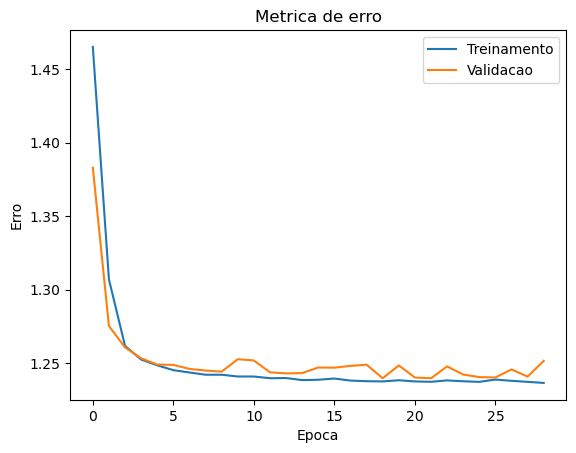

268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step

--> Acuracia (treino): 0.1282
--> Acuracia (validacao): 0.1200
--> acc_train - acc_val = 0.0082
--> E_val - E_in = 0.0150


In [160]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# softmax + class weights

In [19]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

y = to_categorical(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
# print unique values for each col
for col in X.columns:
    print(f"{col}: {X[col].unique()}")

faz_licao_casa_2.0: [ True False]
reprovacao_0.0: [ True False]
reprovacao_1.0: [False  True]
pai_sabe_ler_escrever_1.0: [False  True]
leitura_revista_comportamento_0.0: [ True False]
leitura_jornais_0.0: [ True False]
escolaridade_pai_4.0: [False  True]
mae_sabe_ler_escrever_1.0: [ True False]
leitura_internet_2.0: [ True False]
tempo_lazer_1.0: [ True False]
escolaridade_mae_4.0: [False  True]
gosta_estudar_disciplina_0.0: [False  True]
gosta_estudar_disciplina_1.0: [ True False]


In [22]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Supondo que y_train seja uma matriz one-hot encoded
y_train_labels = np.argmax(y_train, axis=1)
classes = np.unique(y_train_labels)

# Calcular pesos de classe
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_labels)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.7461003984701948, 1: 0.4665673286419073, 2: 2.1763331581099234, 3: 17.575943396226414}


In [23]:
print(X_train.shape)

(149044, 13)


In [24]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 564 (2.20 KB)

 Trainable params: 564 (2.20 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es], class_weight=class_weights)

Epoch 1/100
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2833 - loss: 1.2868 - val_accuracy: 0.3433 - val_loss: 1.2554
Epoch 2/100
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3255 - loss: 1.2388 - val_accuracy: 0.3208 - val_loss: 1.2884
Epoch 3/100
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3255 - loss: 1.2420 - val_accuracy: 0.3420 - val_loss: 1.2388
Epoch 4/100
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3313 - loss: 1.2357 - val_accuracy: 0.3040 - val_loss: 1.2880
Epoch 5/100
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3302 - loss: 1.2253 - val_accuracy: 0.3127 - val_loss: 1.2876
Epoch 6/100
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3315 - loss: 1.2333 - val_accuracy: 0.3421 - val_loss: 1.2327
Epoch 7/100
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3318 - loss: 1.2308 - val_accuracy: 0.3301 - val_loss: 1.2822
Epoch 8/100
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.3366 - loss: 1

In [26]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

1456/1456 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step
              precision    recall  f1-score   support

           0       0.46      0.57      0.51     15561
           1       0.59      0.23      0.33     25160
           2       0.15      0.18      0.16      5211
           3       0.04      0.67      0.07       645

    accuracy                           0.34     46577
   macro avg       0.31      0.41      0.27     46577
weighted avg       0.49      0.34      0.37     46577



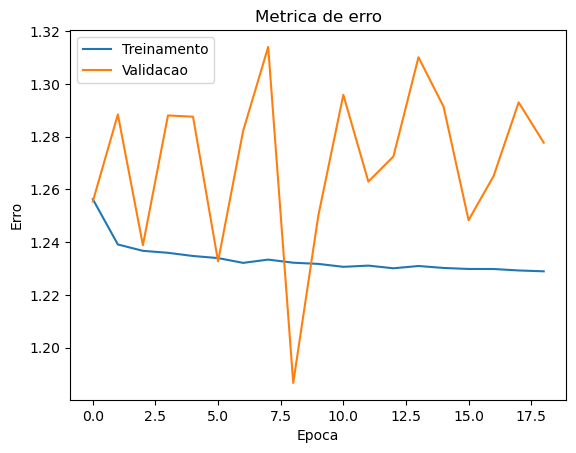

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

# softmax + smote

In [40]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat'])
y = df['desempenho_aluno_cat']

X_numeric = X.astype(int)
y_numeric = y.astype(int)

In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='minority')
X_res, y_res = smote.fit_resample(X_numeric, y_numeric)

print('Resampled dataset shape %s' % Counter(y_res))

# Converter y_res para categórico
y = to_categorical(y_res)
y_values = y_res
X = X_res

# Dividir os dados em conjuntos de treino, validação e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, X_test.shape

Resampled dataset shape Counter({3: 124830, 1: 124830, 0: 78056, 2: 26662})


((226801, 13), (56701, 13), (70876, 13))

In [44]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dense(8, activation='tanh', kernel_initializer='normal'))
model.add(Dense(8, activation='tanh', kernel_initializer='normal'))
model.add(Dense(4, kernel_initializer='normal', activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Compilar o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396 (1.55 KB)

 Trainable params: 396 (1.55 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[es])

Epoch 1/100
3544/3544 ━━━━━━━━━━━━━━━━━━━━ 3s 765us/step - accuracy: 0.4815 - loss: 1.1838 - val_accuracy: 0.5095 - val_loss: 1.1029
Epoch 2/100
3544/3544 ━━━━━━━━━━━━━━━━━━━━ 3s 782us/step - accuracy: 0.5112 - loss: 1.0999 - val_accuracy: 0.5090 - val_loss: 1.1010
Epoch 3/100
3544/3544 ━━━━━━━━━━━━━━━━━━━━ 3s 846us/step - accuracy: 0.5103 - loss: 1.0993 - val_accuracy: 0.5087 - val_loss: 1.0996
Epoch 4/100
3544/3544 ━━━━━━━━━━━━━━━━━━━━ 4s 995us/step - accuracy: 0.5129 - loss: 1.0983 - val_accuracy: 0.5107 - val_loss: 1.0979
Epoch 5/100
3544/3544 ━━━━━━━━━━━━━━━━━━━━ 4s 991us/step - accuracy: 0.5102 - loss: 1.0986 - val_accuracy: 0.5127 - val_loss: 1.0984
Epoch 6/100
1241/3544 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.5146 - loss: 1.0905

KeyboardInterrupt: 

In [ ]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

print(classification_report(y_test, y_pred))

2253/2253 ━━━━━━━━━━━━━━━━━━━━ 2s 789us/step
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     16719
           1       0.62      0.43      0.51     25176
           2       0.00      0.00      0.00      5316
           3       0.66      0.81      0.73     24874

    accuracy                           0.66     72085
   macro avg       0.49      0.56      0.51     72085
weighted avg       0.61      0.66      0.62     72085



/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


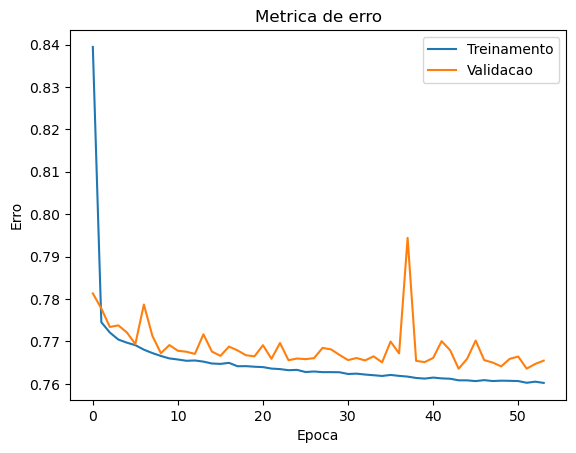

7209/7209 ━━━━━━━━━━━━━━━━━━━━ 6s 836us/step
1803/1803 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step

--> Acuracia (treino): 0.6058
--> Acuracia (validacao): 0.6011
--> acc_train - acc_val = 0.0047
--> E_val - E_in = 0.0053


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# target + binary classification

In [46]:
# transforming target

median = df['proficiencia'].median()

print(median)

df['target'] = np.where(df['proficiencia'] > median, 1, 0)
df['target'].value_counts()

-0.3086185


target
1    116441
0    116441
Name: count, dtype: int64

In [47]:
X = df.drop(columns=exclude + ['desempenho_aluno_cat', 'proficiencia', 'target'])
y = df['target']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [52]:
model = Sequential()

model.add(Dense(16, input_dim=X_train.shape[1], activation='tanh', kernel_regularizer='l2'))
model.add(Dense(16, activation='tanh', kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, callbacks=[es])

Epoch 1/20
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6055 - loss: 0.6995 - val_accuracy: 0.6249 - val_loss: 0.6495
Epoch 2/20
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6165 - loss: 0.6553 - val_accuracy: 0.6217 - val_loss: 0.6497
Epoch 3/20
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6179 - loss: 0.6537 - val_accuracy: 0.6230 - val_loss: 0.6491
Epoch 4/20
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6186 - loss: 0.6536 - val_accuracy: 0.6261 - val_loss: 0.6504
Epoch 5/20
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6194 - loss: 0.6541 - val_accuracy: 0.6223 - val_loss: 0.6501
Epoch 6/20
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 2s 894us/step - accuracy: 0.6174 - loss: 0.6540 - val_accuracy: 0.6243 - val_loss: 0.6492
Epoch 7/20
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6181 - loss: 0.6532 - val_accuracy: 0.6245 - val_loss: 0.6486
Epoch 8/20
2329/2329 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6164 - loss: 0.6544 

In [54]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

1456/1456 ━━━━━━━━━━━━━━━━━━━━ 1s 407us/step
              precision    recall  f1-score   support

           0       0.62      0.63      0.62     23245
           1       0.63      0.62      0.62     23332

    accuracy                           0.62     46577
   macro avg       0.62      0.62      0.62     46577
weighted avg       0.62      0.62      0.62     46577



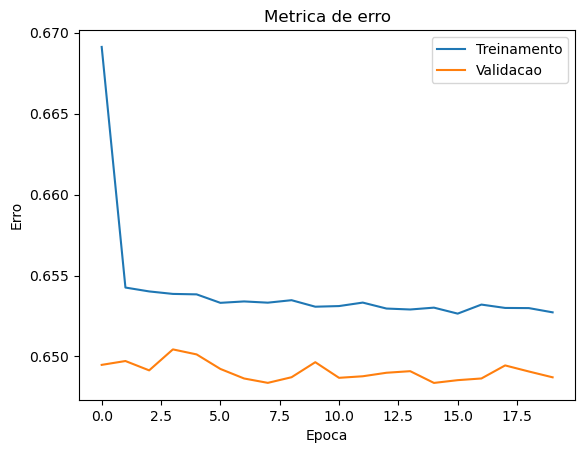

4658/4658 ━━━━━━━━━━━━━━━━━━━━ 2s 373us/step
1165/1165 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step

--> Acuracia (treino): 0.6196
--> Acuracia (validacao): 0.6249
--> acc_train - acc_val = -0.0053
--> E_val - E_in = -0.0040


In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# target + dropping 'Proficiente'

In [56]:
_df = df.copy()
_df = _df[_df['desempenho_aluno'] != 'Proficiente']

In [57]:
median = _df['proficiencia'].median()

print(median)

_df['target'] = np.where(_df['proficiencia'] > median, 1, 0)
_df['target'].value_counts()

-0.426404


target
0    103110
1    103110
Name: count, dtype: int64

In [58]:
X = _df.drop(columns=exclude + ['desempenho_aluno_cat', 'proficiencia', 'target'])
y = _df['target']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [60]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='tanh', kernel_initializer='normal'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64, callbacks=[es])

Epoch 1/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 2s 905us/step - accuracy: 0.5945 - loss: 0.6657 - val_accuracy: 0.5980 - val_loss: 0.6636
Epoch 2/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5986 - loss: 0.6644 - val_accuracy: 0.5966 - val_loss: 0.6642
Epoch 3/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5978 - loss: 0.6644 - val_accuracy: 0.5974 - val_loss: 0.6637
Epoch 4/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5993 - loss: 0.6637 - val_accuracy: 0.5974 - val_loss: 0.6636
Epoch 5/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6011 - loss: 0.6625 - val_accuracy: 0.5979 - val_loss: 0.6641
Epoch 6/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5985 - loss: 0.6643 - val_accuracy: 0.5993 - val_loss: 0.6638
Epoch 7/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5997 - loss: 0.6637 - val_accuracy: 0.5988 - val_loss: 0.6639
Epoch 8/20
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.5987 - loss: 0.664

In [63]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

1289/1289 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step
              precision    recall  f1-score   support

           0       0.59      0.62      0.61     20554
           1       0.60      0.58      0.59     20690

    accuracy                           0.60     41244
   macro avg       0.60      0.60      0.60     41244
weighted avg       0.60      0.60      0.60     41244



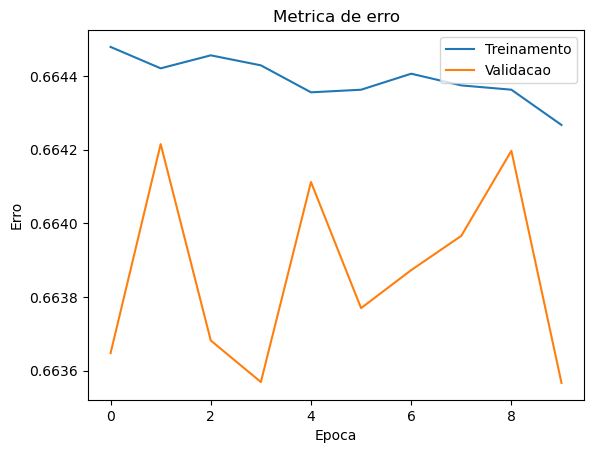

4125/4125 ━━━━━━━━━━━━━━━━━━━━ 2s 366us/step
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step

--> Acuracia (treino): 0.5991
--> Acuracia (validacao): 0.5995
--> acc_train - acc_val = -0.0004
--> E_val - E_in = -0.0007


In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# binary (dropping 'Básico' + 'Proficiente')

In [65]:
_df = df.copy()
_df = _df[_df['desempenho_aluno'] != 'Proficiente']
_df = _df[_df['desempenho_aluno'] != 'Básico']

In [66]:
X = _df.drop(columns=exclude + ['desempenho_aluno_cat', 'proficiencia', 'target'])
y = _df['desempenho_aluno_cat']

X = X.astype(int)
y = y.astype(int)

# 0 when cat = 0, 1 when else
y = np.where(y == 0, 0, 1)

In [67]:
# value counts for y
np.unique(y, return_counts=True)

# calculate class weights (not balanced)
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

# convert to dict
class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: 0.5213564620272625, 1: 12.206058788242352}


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [70]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape)

(52089, 13) (13023, 13) (16278, 13)
(52089,)


In [71]:
model = Sequential()

model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dense(8, activation='relu', kernel_regularizer='l2'))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, callbacks=[es])

Epoch 1/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.8524 - loss: 0.5385 - val_accuracy: 0.9585 - val_loss: 0.1729
Epoch 2/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.9606 - loss: 0.1628 - val_accuracy: 0.9585 - val_loss: 0.1570
Epoch 3/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.9592 - loss: 0.1541 - val_accuracy: 0.9585 - val_loss: 0.1516
Epoch 4/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9607 - loss: 0.1470 - val_accuracy: 0.9585 - val_loss: 0.1488
Epoch 5/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.9593 - loss: 0.1475 - val_accuracy: 0.9585 - val_loss: 0.1465
Epoch 6/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.9594 - loss: 0.1461 - val_accuracy: 0.9585 - val_loss: 0.1442
Epoch 7/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - accuracy: 0.9593 - loss: 0.1459 - val_accuracy: 0.9585 - val_loss: 0.1430
Epoch 8/50
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.9604 - loss: 0.1401 - 

Melhor: 0.962387118052677 usando {'model__reg_rate': 0.001, 'model__optimizer': <keras.src.optimizers.adam.Adam object at 0x75c8ebdc1250>, 'model__neurons': 8, 'model__activation': 'tanh', 'epochs': 50, 'batch_size': 32}

In [74]:
# confusion matrix
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

print(classification_report(y_test, y_pred))

509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     15600
           1       0.00      0.00      0.00       678

    accuracy                           0.96     16278
   macro avg       0.48      0.50      0.49     16278
weighted avg       0.92      0.96      0.94     16278



/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/erlo/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


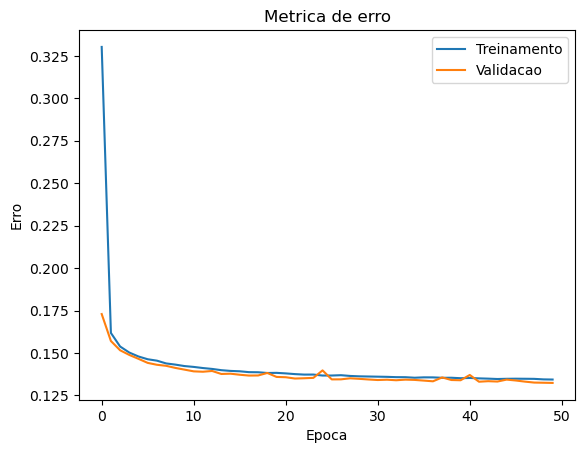

1628/1628 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step
407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step

--> Acuracia (treino): 0.9594
--> Acuracia (validacao): 0.9585
--> acc_train - acc_val = 0.0008
--> E_val - E_in = -0.0020


In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# binary + target (dropping 'Básico' e 'Proficiente')

In [76]:
_df = df.copy()

In [77]:
median = _df['proficiencia'].median()

print(median)

_df['target'] = np.where(_df['proficiencia'] > median, 1, 0)

-0.3086185


In [78]:
_df = _df[_df['desempenho_aluno'] != 'Proficiente']
_df = _df[_df['desempenho_aluno'] != 'Básico']

In [79]:
X = _df.drop(columns=exclude + ['desempenho_aluno_cat', 'proficiencia', 'target'])
y = _df['target']

X = X.astype(int)
y = y.astype(int)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(52089, 13) (13023, 13) (16278, 13)


In [81]:
model = Sequential()

model.add(Dense(16, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dense(8, activation='relu', kernel_regularizer='l2'))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=48, callbacks=[es])

Epoch 1/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.9523 - loss: 0.4347 - val_accuracy: 0.9585 - val_loss: 0.1704
Epoch 2/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 637us/step - accuracy: 0.9598 - loss: 0.1640 - val_accuracy: 0.9585 - val_loss: 0.1580
Epoch 3/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.9602 - loss: 0.1534 - val_accuracy: 0.9585 - val_loss: 0.1519
Epoch 4/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step - accuracy: 0.9604 - loss: 0.1497 - val_accuracy: 0.9585 - val_loss: 0.1485
Epoch 5/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.9594 - loss: 0.1480 - val_accuracy: 0.9585 - val_loss: 0.1471
Epoch 6/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.9602 - loss: 0.1447 - val_accuracy: 0.9585 - val_loss: 0.1442
Epoch 7/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.9601 - loss: 0.1430 - val_accuracy: 0.9585 - val_loss: 0.1436
Epoch 8/50
1086/1086 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step - accuracy: 0.9598 -